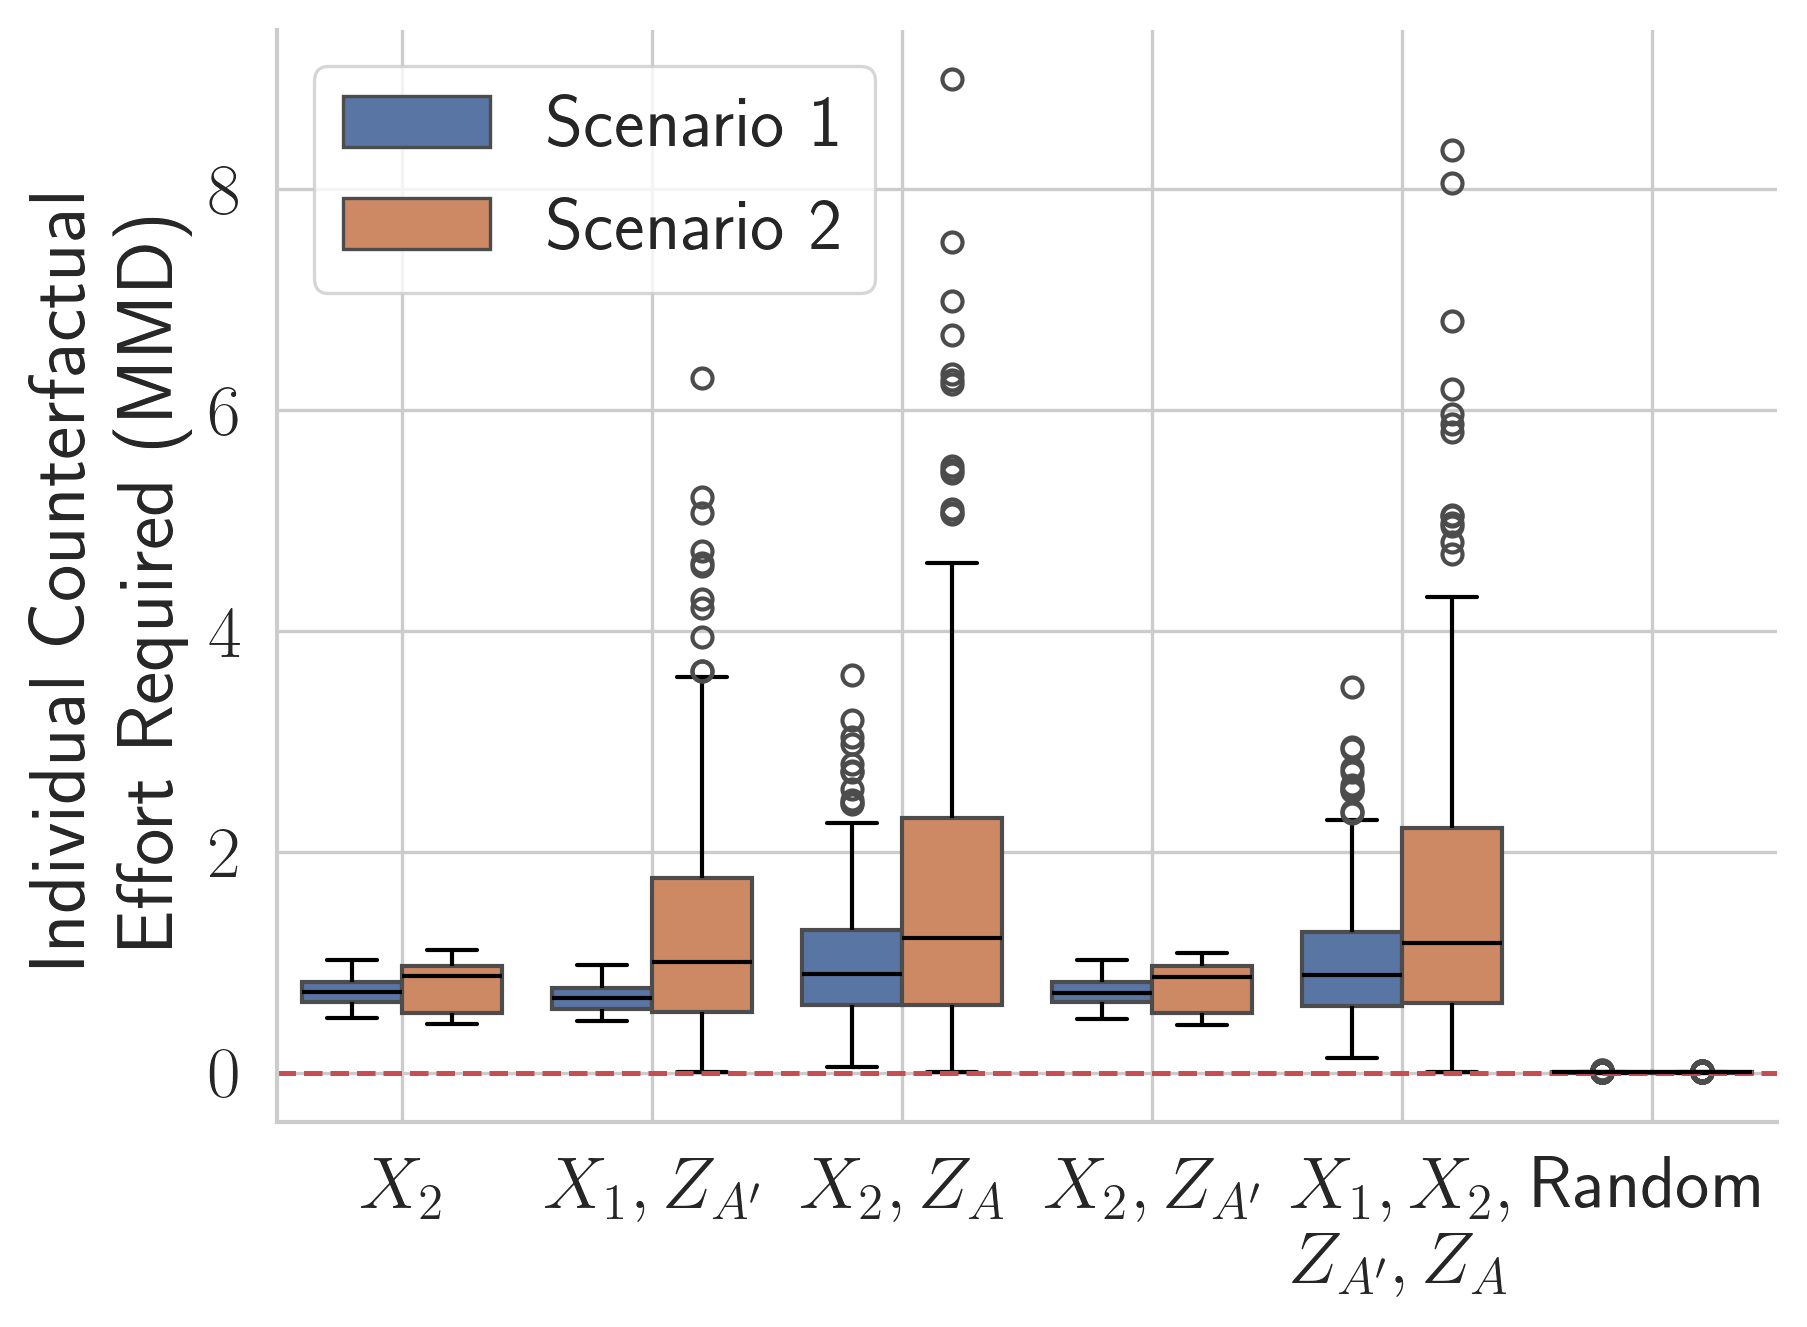

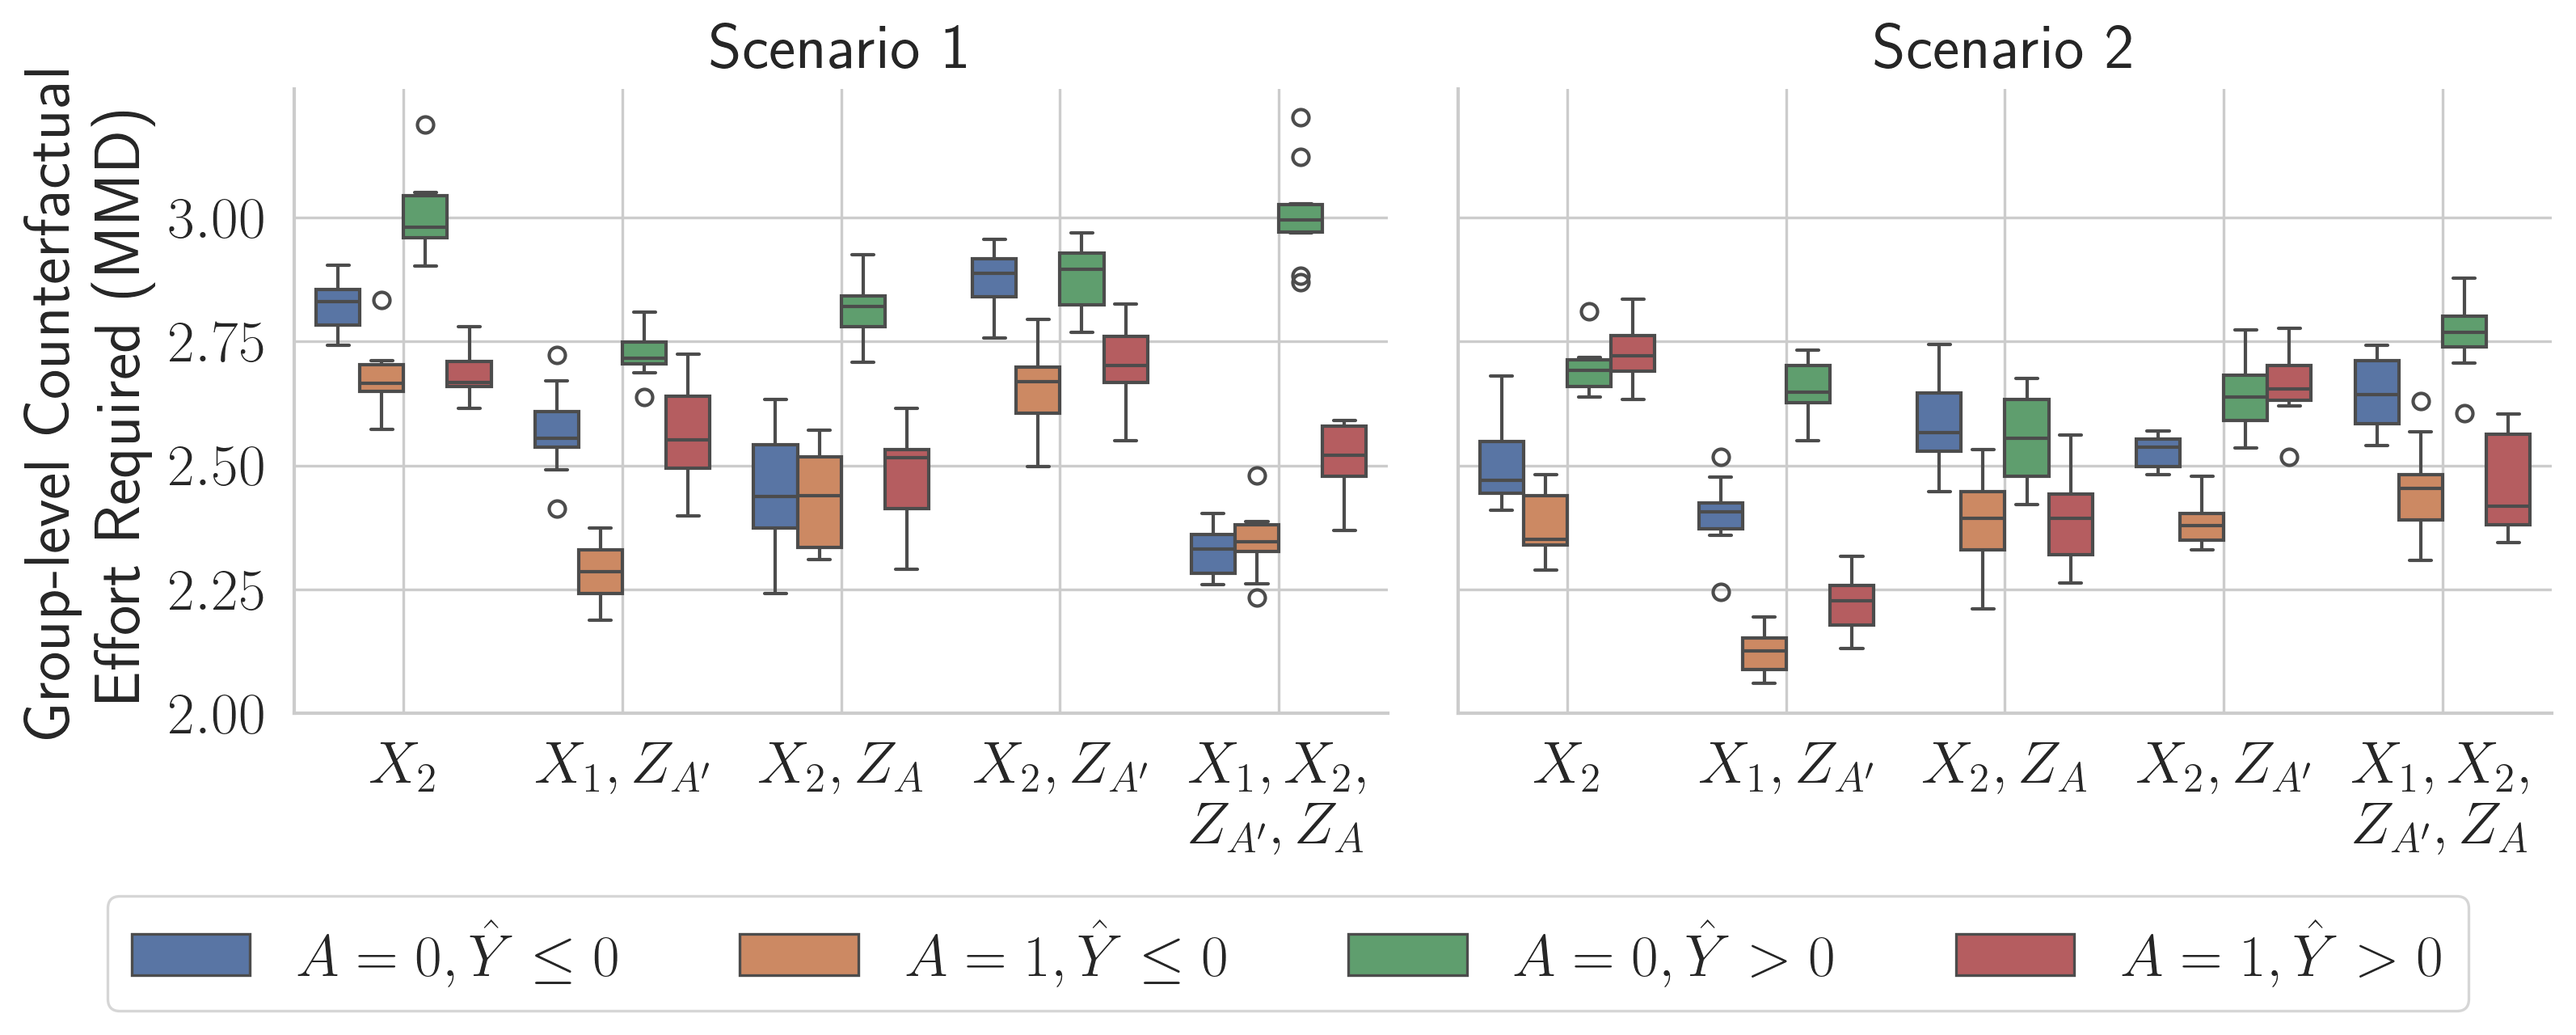

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

individual_s1_df = pd.read_csv('results/effort_s1_X_1,X_2,Z_A_prime,n=500,nS=1000,nL=1000.csv', header=0, index_col=0)
individual_s1_df['Scenario'] = 'Scenario 1'
individual_s2_df = pd.read_csv('results/effort_s2a_X_1,X_2,Z_A_prime,n=500,nS=1000,nL=1000.csv', header=0, index_col=0)
individual_s2_df['Scenario'] = 'Scenario 2'
individual_df = pd.concat([individual_s1_df, individual_s2_df], axis=0)
individual_df = individual_df.melt(id_vars=['Scenario'], var_name='Model', value_name='Distance')

plt.figure(dpi=300)
boxplot_settings = {
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}
sns.set(rc={'text.usetex' : True}, font_scale=2, context='paper')
sns.set_style('whitegrid')
sns.boxplot(x='Model', y='Distance', hue='Scenario', orient='v', data=individual_df, **boxplot_settings)
sns.despine(right = True)
plt.axhline(y=0, linestyle='dashed', color='r')
plt.ylabel('Individual Counterfactual\nEffort Required (MMD)')
plt.xlabel('')
plt.legend(title='')
plt.gca().xaxis.grid(True)
plt.tight_layout()
plt.show()

group_s1_df = pd.read_csv('results/effort_s1_group_X_1,X_2,Z_A_prime,n=500,nS=1000,nL=1000.csv', header=0, index_col=0)
group_s1_df['Scenario'] = 'Scenario 1'
group_s2_df = pd.read_csv('results/effort_s2a_group_X_1,X_2,Z_A_prime,n=500,nS=1000,nL=1000.csv', header=0, index_col=0)
group_s2_df['Scenario'] = 'Scenario 2'
group_df = pd.concat([group_s1_df, group_s2_df], axis=0)
group_df = group_df.melt(id_vars=['Scenario'], var_name='Model', value_name='Distance')

fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, dpi=300, figsize=(11, 4))
axes = axes.ravel()
sns.set(rc={'text.usetex' : True}, font_scale=2, context='paper')
sns.set_style('whitegrid')

sns.boxplot(x='model', y='distance', hue='group', data=group_s1_df[group_s1_df.model != 'Random'], ax=axes[0])
sns.despine(right = True)
axes[0].set_title('Scenario 1')
axes[0].set_ylabel('Group-level Counterfactual\nEffort Required (MMD)')
axes[0].set_xlabel('')
axes[0].legend([],[], frameon=False)

sns.boxplot(x='model', y='distance', hue='group', data=group_s2_df[group_s2_df.model != 'Random'], ax=axes[1])
sns.despine(right = True)
axes[1].set_title('Scenario 2')
axes[1].set_ylabel('')
axes[1].set_xlabel('')
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend([],[], frameon=False)
axes[0].set_yticks([2.00, 2.25, 2.5, 2.75, 3.00])

fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.06), ncol=4)

axes[0].xaxis.grid(True)
axes[1].xaxis.grid(True)
plt.tight_layout()
plt.show()